In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Importing the data for all earthquakes and obtaining all the data for large earthquakes
earthquakes = pd.read_excel('./All datasets/Dataset_Taiwan.xlsx', sheet_name = 1)
large_earthquakes = earthquakes[earthquakes.Mag >= 6].reset_index()
large_earthquakes = large_earthquakes.drop(columns = ['index'])
large_earthquakes

,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag
0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8
1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2
2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1
3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9
4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2
5,1972-09-23,02:14:26.800000,22.3190,121.3550,33.0,6.1
6,1972-11-09,18:41:14.500000,23.8850,121.5810,33.0,6.1
7,1978-07-23,14:42:36.900000,22.2820,121.5120,17.0,7.4
8,1978-09-02,01:57:33.400000,24.8960,121.9850,109.0,6.1
9,1986-05-20,05:25:46.960000,24.1250,121.6190,19.3,6.1


In [11]:
# Finding out the interevent counts for each earthquake
interevent_counts = []
i = 0
for ind, row in earthquakes.iterrows():
    if row['Mag'] < 6:
        i = i + 1
    else:
        interevent_counts.append(i)
        i = 0
interevent_counts.append(i)
len(interevent_counts)
interevent_counts_new = pd.Series(interevent_counts)
interevent_counts_new

0      10
1      24
2      81
3      22
4      19
5       0
6       9
7      92
8      34
9     207
10     19
11      1
12    349
13     44
14     83
15    166
16      0
17      0
18      0
19      0
20     23
21     37
22     30
23     62
24     52
25    131
26     60
27     33
28     65
29    158
30     54
31      0
32     24
33     90
34     34
35     88
36     12
37      9
38    191
39     17
40    128
41    126
42    109
43     83
dtype: int64

In [12]:
#Adding the intervent counts data to the large magnitude earthquakes dataset
earthquakes_new = pd.concat([large_earthquakes, interevent_counts_new], axis=1)
earthquakes_new

,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,0
0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8,10
1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24
2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1,81
3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9,22
4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19
5,1972-09-23,02:14:26.800000,22.3190,121.3550,33.0,6.1,0
6,1972-11-09,18:41:14.500000,23.8850,121.5810,33.0,6.1,9
7,1978-07-23,14:42:36.900000,22.2820,121.5120,17.0,7.4,92
8,1978-09-02,01:57:33.400000,24.8960,121.9850,109.0,6.1,34
9,1986-05-20,05:25:46.960000,24.1250,121.6190,19.3,6.1,207


In [13]:
earthquakes_new.rename({0 : 'Interevent Counts'}, axis='columns', inplace =True)

In [14]:
earthquakes_new

,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,Interevent Counts
0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8,10
1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24
2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1,81
3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9,22
4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19
5,1972-09-23,02:14:26.800000,22.3190,121.3550,33.0,6.1,0
6,1972-11-09,18:41:14.500000,23.8850,121.5810,33.0,6.1,9
7,1978-07-23,14:42:36.900000,22.2820,121.5120,17.0,7.4,92
8,1978-09-02,01:57:33.400000,24.8960,121.9850,109.0,6.1,34
9,1986-05-20,05:25:46.960000,24.1250,121.6190,19.3,6.1,207


In [15]:
#Discarding all those large magnitude earthquakes for which the intervent count is zero
earthquakes_final = earthquakes_new[earthquakes_new['Interevent Counts'] != 0]
earthquakes_final

,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,Interevent Counts
0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8,10
1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24
2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1,81
3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9,22
4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19
6,1972-11-09,18:41:14.500000,23.8850,121.5810,33.0,6.1,9
7,1978-07-23,14:42:36.900000,22.2820,121.5120,17.0,7.4,92
8,1978-09-02,01:57:33.400000,24.8960,121.9850,109.0,6.1,34
9,1986-05-20,05:25:46.960000,24.1250,121.6190,19.3,6.1,207
10,1986-11-14,21:20:10.550000,23.9010,121.5740,33.8,7.8,19


In [16]:
earthquakes_final = earthquakes_final.reset_index()
earthquakes_final = earthquakes_final.drop(columns = ['index'])
earthquakes_final

,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,Interevent Counts
0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8,10
1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24
2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1,81
3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9,22
4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19
5,1972-11-09,18:41:14.500000,23.8850,121.5810,33.0,6.1,9
6,1978-07-23,14:42:36.900000,22.2820,121.5120,17.0,7.4,92
7,1978-09-02,01:57:33.400000,24.8960,121.9850,109.0,6.1,34
8,1986-05-20,05:25:46.960000,24.1250,121.6190,19.3,6.1,207
9,1986-11-14,21:20:10.550000,23.9010,121.5740,33.8,7.8,19


In [183]:
# After final preprocessing of the dataset, we convert the dataset into an excel file
earthquakes_final.to_excel('Dataset_Taiwan_Preprocessed.xlsx')

In [17]:
#Removing final interevent count as that is responsible for finding EPS Score of the country of Taiwan
from scipy import stats
interevent_counts_final = earthquakes_final['Interevent Counts'][:37]
interevent_counts_final 

0      10
1      24
2      81
3      22
4      19
5       9
6      92
7      34
8     207
9      19
10      1
11    349
12     44
13     83
14    166
15     23
16     37
17     30
18     62
19     52
20    131
21     60
22     33
23     65
24    158
25     54
26     24
27     90
28     34
29     88
30     12
31      9
32    191
33     17
34    128
35    126
36    109
Name: Interevent Counts, dtype: int64

In [18]:
#Generating best fit curves of candidate distributions on the histogram plot of Interevent Counts Data

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)
    return pdf

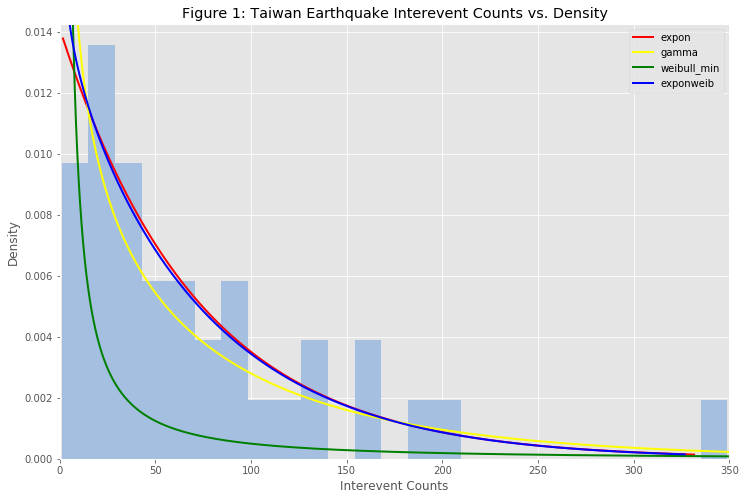

In [19]:
# %matplotlib inline
import warnings
import matplotlib
from matplotlib.pyplot import cm
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12.0, 8)

DISTRIBUTIONS = [        
stats.expon, stats.gamma, stats.weibull_min, stats.exponweib
]
colors=iter(['red', 'yellow', 'green', 'blue'])

# Estimate distribution parameters from data and then plotting curves to show bestfit curve
for distribution in DISTRIBUTIONS:
   
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        params = distribution.fit(interevent_counts_final)
        dist = getattr(stats, distribution.name)

        pdf = make_pdf(distribution, params)
        ax = interevent_counts_final.plot(kind='hist', bins=25, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[2]['color'] )
        
        # Save plot limits
        dataYLim = ax.get_ylim()
        ax.set_ylim(dataYLim)
        ax.set_xlim((0,350))       
        
        pdf.plot(lw = 2, label=distribution.name, legend=True, color = next(colors))
        interevent_counts_final.plot(kind='hist', bins=25,density=True,alpha=0.5,ax=ax, color = 'lightblue')
        
        #Setting title and labels
        ax.set_title(u'Figure 1: Taiwan Earthquake Interevent Counts vs. Density')
        ax.set_xlabel(u'Interevent Counts')
        ax.set_ylabel('Density')

    

In [4]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [24]:
taiwan_map = gpd.read_file('./data/Map 1/TWN_adm1.shp')
taiwan_map_0 = gpd.read_file('./data/Map 0/TWN_adm0.shp')

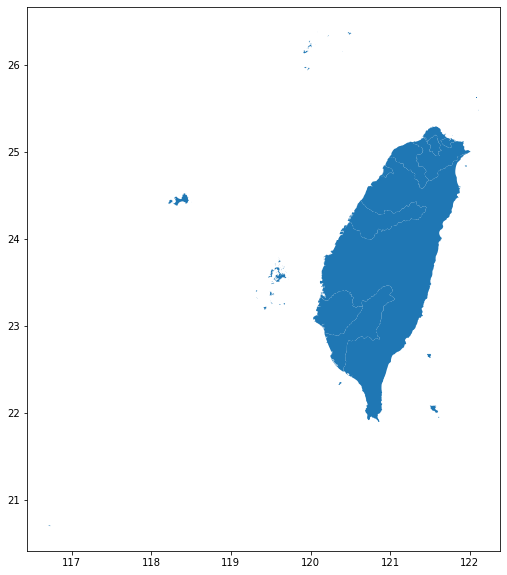

In [8]:
fig,ax = plt.subplots(figsize = (10, 10))
taiwan_map.plot(ax = ax)

In [20]:
earthquakes.head()

,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag
0,1963-02-13,09:30:39.200000,24.6,121.8,77.0,5.4
1,1963-03-04,13:38:42.500000,24.5,121.8,33.0,4.8
2,1963-04-04,13:43:24.500000,21.1,121.0,27.0,4.2
3,1963-05-25,01:35:54.100000,24.6,121.8,69.0,5.4
4,1963-09-14,02:13:41.200000,22.0,121.3,90.0,5.0


In [21]:
geometry = [Point(xy) for xy in zip(earthquakes['Lon'], earthquakes['Lat'])]
geometry[:3]

In [26]:
crs = {'init': 'epsg:4326'}
geo_earthquakes = gpd.GeoDataFrame(earthquakes, crs = crs, geometry = geometry)
geo_earthquakes.head()

C:\Users\arshk\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,geometry
0,1963-02-13,09:30:39.200000,24.6,121.8,77.0,5.4,POINT (121.80000 24.60000)
1,1963-03-04,13:38:42.500000,24.5,121.8,33.0,4.8,POINT (121.80000 24.50000)
2,1963-04-04,13:43:24.500000,21.1,121.0,27.0,4.2,POINT (121.00000 21.10000)
3,1963-05-25,01:35:54.100000,24.6,121.8,69.0,5.4,POINT (121.80000 24.60000)
4,1963-09-14,02:13:41.200000,22.0,121.3,90.0,5.0,POINT (121.30000 22.00000)


Text(0.5, 1, 'Figure 3: Taiwan Large Earthquakes Scatter Map')

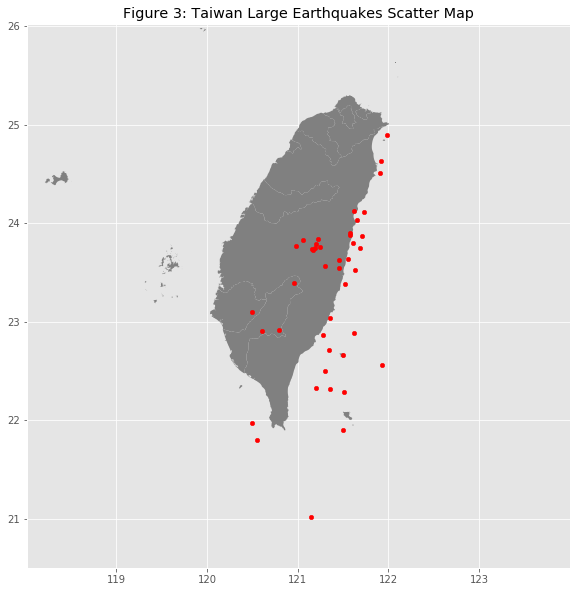

In [23]:
minx, miny, maxx, maxy = geo_earthquakes.total_bounds
fig,ax = plt.subplots(figsize = (10, 10))
ax.set_xlim(minx-2, maxx+2)
ax.set_ylim(miny-0.5, maxy+0.5)
taiwan_map.plot(ax = ax, color = 'grey')
geo_earthquakes[geo_earthquakes['Mag']>=6].plot(ax=ax, markersize=20,color='red', marker = 'o', label = 'large')
# geo_earthquakes[geo_earthquakes['Mag']<6].plot(ax=ax, markersize=10,color='green', marker = '^', label = 'small')
# plt.legend(prop={'size': 15})
plt.title('Figure 3: Taiwan Large Earthquakes Scatter Map')

Text(0.5, 1, 'Figure 2: Taiwan Earthquakes Scatter Map')

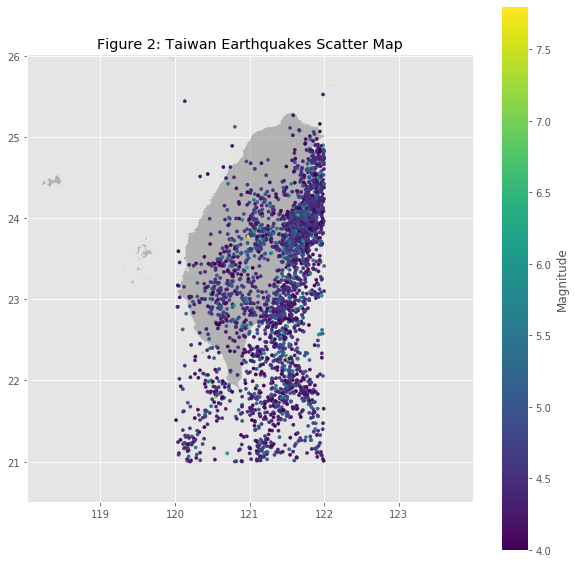

In [25]:
minx, miny, maxx, maxy = geo_earthquakes.total_bounds
fig,ax = plt.subplots(figsize = (10, 10))
ax.set_xlim(minx-2, maxx+2)
ax.set_ylim(miny-0.5, maxy+0.5)
taiwan_map_0.plot(ax = ax, alpha =0.5, color = 'grey')
geo_earthquakes.plot(ax=ax, column='Mag', legend = True, cmap='viridis',markersize=10, 
         legend_kwds={'label': "Magnitude",
                      'orientation': "vertical"})
plt.title('Figure 2: Taiwan Earthquakes Scatter Map')